In [6]:
import pandas as pd
import numpy as np
import lasio

las = lasio.read(r'C:\\Users\\Administrateur\\Downloads\\1050383876.las')

In [7]:
las.curves

[CurveItem(mnemonic=DEPT, unit=FT, value=0 000 00 00, descr=Depth, original_mnemonic=DEPT, data.shape=(7056,)),
 CurveItem(mnemonic=CNPOR, unit=PU, value=0, descr=CN Selected Porosity, original_mnemonic=CNPOR, data.shape=(7056,)),
 CurveItem(mnemonic=DCAL, unit=IN, value=0, descr=Caliper from Density Tool, original_mnemonic=DCAL, data.shape=(7056,)),
 CurveItem(mnemonic=DPOR, unit=PU, value=0, descr=Density Porosity, original_mnemonic=DPOR, data.shape=(7056,)),
 CurveItem(mnemonic=GR, unit=GAPI, value=0, descr=Gamma Ray, original_mnemonic=GR, data.shape=(7056,)),
 CurveItem(mnemonic=RHOB, unit=G/CC, value=0, descr=Bulk Density, original_mnemonic=RHOB, data.shape=(7056,)),
 CurveItem(mnemonic=RHOC, unit=G/CC, value=0, descr=Density Correction, original_mnemonic=RHOC, data.shape=(7056,)),
 CurveItem(mnemonic=RILD, unit=OHM-M, value=0, descr=DIL Deep Resistivity, original_mnemonic=RILD, data.shape=(7056,)),
 CurveItem(mnemonic=RILM, unit=OHM-M, value=0, descr=DIL Medium Resistivity, origi

In [8]:
#Using this command, we can see the available curve logs with fundamental information such as units and sample data points quantity in the file. lasio has other functions but I personally prefer to convert LAS file into a pandas data frame to get advantages of its popular functions:

df = las.df()    #store las file in df variable as pandas dataframe

In [9]:
df.head()

,CNPOR,DCAL,DPOR,GR,RHOB,RHOC,RILD,RILM,RLL3,RXORT,SP,MEL15,MEL20,DT,ITT,MELCAL,SPOR
DEPT,,,,,,,,,,,,,,,,,
6.0,NaN,NaN,NaN,23.8362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6.5,NaN,NaN,NaN,28.8864,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7.0,NaN,NaN,NaN,33.1935,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7.5,NaN,NaN,NaN,34.6154,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8.0,NaN,NaN,NaN,36.0153,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df.shape


(7056, 17)

In [12]:
df.columns

Index(['CNPOR', 'DCAL', 'DPOR', 'GR', 'RHOB', 'RHOC', 'RILD', 'RILM', 'RLL3',
       'RXORT', 'SP', 'MEL15', 'MEL20', 'DT', 'ITT', 'MELCAL', 'SPOR'],
      dtype='object')

In [13]:
#From these logs, I would rather select columns of neutron porosity, Gamma Ray, Bulk Density, Sonic, Caliper and calculated Sonic porosity and store in a new variable. Remember to use double brackets as follows :

df_selected = df[['CNPOR', 'GR', 'RHOB', 'DT', 'MELCAL', 'SPOR']]

In [14]:
df_selected.isna().sum()

CNPOR     2064
GR          58
RHOB      2026
DT          51
MELCAL    2030
SPOR        51
dtype: int64

In [15]:
#Let’s suppose that we want to preserve GR, DT, and SPOR as important logs in the data set. So, to get rid of missing values we can drop rows that one of those logs is missed in that row.

df_dropped = df_selected.dropna(subset=['GR', 'DT', 'SPOR'],axis=0, how='any')

In [16]:
df_dropped.describe()

,CNPOR,GR,RHOB,DT,MELCAL,SPOR
count,4992.000000,6962.000000,5010.000000,6962.000000,5010.000000,6962.000000
mean,19.184611,58.035839,2.494757,82.001241,8.805313,24.329025
std,7.939384,29.548550,0.207499,29.147369,2.242689,20.613416
min,-0.087500,5.712800,1.421800,36.290500,7.148400,-7.998200
25%,13.698600,36.854175,2.441700,63.909100,7.773200,11.533975
50%,19.939850,54.724650,2.542100,74.307050,7.929500,18.887600
75%,24.594525,74.357100,2.617100,91.237475,8.648550,30.861000
max,45.596600,345.344000,2.978700,275.567300,18.451900,161.221500


In [17]:
#There are several ways to filter data such as zscore. In this method, we can get rid of values that out of a specific range of standard deviation such as 2 or more. I personally prefer high/low cut filter because I can control the minimum and maximum values as:

df_filt = df_dropped[(df_dropped.CNPOR > -15)&(df_dropped.GR <= 50)]
df_filt = df_dropped[(df_dropped.GR > 0) & (df_dropped.GR  <= 250)]
df_filt = df_dropped[(df_dropped.RHOB> 1) & (df_dropped.RHOB<= 3)]
df_filt = df_dropped[(df_dropped.DT > 30) & (df_dropped.DT <= 140)]

In [18]:
#Vsh=Igr=(GRlog-GRmin)/(GRmax-GRmin)

df = df_filt.copy()      #make a copy of the latest dataset
df['Vsh'] = (df.GR - df.GR.min()) / (df.GR.max() - df.GR.min())

In [19]:
df.head(2)

,CNPOR,GR,RHOB,DT,MELCAL,SPOR,Vsh
DEPT,,,,,,,
24.0,NaN,63.1037,NaN,92.7520,NaN,31.9321,0.168980
24.5,NaN,58.2448,NaN,92.9061,NaN,32.0411,0.154674


In [20]:
#lasio converts the depth column as an index when we read the LAS file. We can call depth as a new column for plotting aim and reindex dataset.

df_idx = df.rename_axis('Depth').reset_index()
df_idx.head()

,Depth,CNPOR,GR,RHOB,DT,MELCAL,SPOR,Vsh
0,24.0,NaN,63.1037,NaN,92.7520,NaN,31.9321,0.168980
1,24.5,NaN,58.2448,NaN,92.9061,NaN,32.0411,0.154674
2,25.0,NaN,52.1383,NaN,92.8725,NaN,32.0173,0.136694
3,25.5,NaN,50.7750,NaN,92.6159,NaN,31.8359,0.132680
4,26.0,NaN,57.7431,NaN,92.2255,NaN,31.5598,0.153196


In [21]:
import matplotlib.pyplot as plt

In [22]:
#To make code readable and re-usable let’s define a function:

def log_plot(logs):
    logs = logs.sort_values(by='Depth')
    top = logs.Depth.min()
    bot = logs.Depth.max()
    
    f, ax = plt.subplots(nrows=1, ncols=6, figsize=(12,8))
    ax[0].plot(logs.GR, logs.Depth, color='green')
    ax[1].plot(logs.CNPOR, logs.Depth, color='red')
    ax[2].plot(logs.DT, logs.Depth, color='black')
    ax[3].plot(logs.MELCAL, logs.Depth, color='blue')
    ax[4].plot(logs.RHOB, logs.Depth, color='c')
    ax[5].plot(logs.Vsh, logs.Depth, color='m')
    
    for i in range(len(ax)):
        ax[i].set_ylim(top,bot)
        ax[i].invert_yaxis()
        ax[i].grid()
        
    ax[0].set_xlabel("GR")
    ax[0].set_xlim(logs.GR.min(),logs.GR.max())
    ax[0].set_ylabel("Depth(ft)")
    ax[1].set_xlabel("CNPOR")
    ax[1].set_xlim(logs.CNPOR.min(),logs.CNPOR.max())
    ax[2].set_xlabel("DT")
    ax[2].set_xlim(logs.DT.min(),logs.DT.max())
    ax[3].set_xlabel("MELCAL")
    ax[3].set_xlim(logs.MELCAL.min(),logs.MELCAL.max())
    ax[4].set_xlabel("RHOB")
    ax[4].set_xlim(logs.RHOB.min(),logs.RHOB.max())
    ax[5].set_xlabel("Vsh")
    ax[5].set_xlim(logs.Vsh.min(),logs.Vsh.max())
    
    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]);
    ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]); ax[5].set_yticklabels([]) 
    
    f.suptitle('Well:KOOCHEL MOUNTAIN #1', fontsize=14,y=0.94)

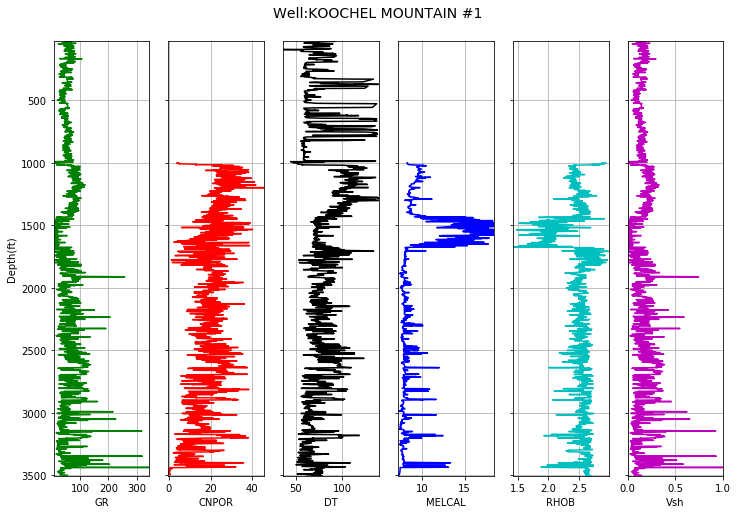

In [23]:
log_plot(df_idx)